# Lab 1 - Practice

In [2]:
import nltk

In [3]:
#nltk.download()

In [4]:
# import the gutenberg corpus
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
hamlet = gutenberg.sents("shakespeare-hamlet.txt")

In [20]:
sum([len(s) for s in hamlet]) / len(hamlet)

12.028332260141662

## NLTK functions
NLTK provides quite a lot of stuff...

Let's access functions available on the Text object

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
[fn for fn in dir(text1) if "__" not in fn]

['_CONTEXT_RE',
 '_COPY_TOKENS',
 '_context',
 '_train_default_ngram_lm',
 'collocation_list',
 'collocations',
 'common_contexts',
 'concordance',
 'concordance_list',
 'count',
 'dispersion_plot',
 'findall',
 'generate',
 'index',
 'name',
 'plot',
 'readability',
 'similar',
 'tokens',
 'vocab']

In [4]:
text1.concordance("fish")

Displaying 25 of 169 matches:
to teach them by what name a whale - fish is to be called in our tongue leavin
 " Now the Lord had prepared a great fish to swallow up Jonah ." -- JONAH . " 
 and robbers , is the right to royal fish , which are whale and sturgeon . And
 the vast Atlantic is ; Not a fatter fish than he , Flounders round the Polar 
 bright red windows of the " Sword - Fish Inn ," there came such fervent rays 
rossed Harpoons ," and " The Sword - Fish ?"-- this , then must needs be the s
ar a faint resemblance to a gigantic fish ? even the great leviathan himself ?
here was a parcel of outlandish bone fish hooks on the shelf over the fire - p
nah --' And God had prepared a great fish to swallow up Jonah .'" " Shipmates 
 noble thing is that canticle in the fish ' s belly ! How billow - like and bo
onah prayed unto the Lord out of the fish ' s belly . But observe his prayer ,
n he cried . Then God spake unto the fish ; and from the shuddering cold and b
 disdain , " ah ! him 

In [5]:
text1.similar("fish")

whale boat ship wind sea way captain line body world man mate time
carpenter leviathan thing crew chase harpoon pequod


In [6]:
text1.common_contexts(["fish"])

fast_what loose_what the_s the_and fast_and loose_and great_to e_e
a_that these_for other_are spouting_with sword_and the_all loose_is
a_is whale_is royal_which fatter_than sword_inn


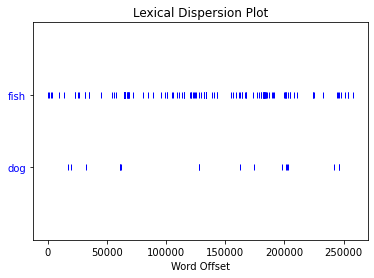

In [7]:
text1.dispersion_plot(["fish", "dog"])

## Basic operations
Length, uniqueness (diversity), sentence operations, ...

In [8]:
print("Total tokens: {}".format(len(text1)))

Total tokens: 260819


In [9]:
print("Unique tokens: {}".format(len(set(text1))))

Unique tokens: 19317


In [10]:
text1[0:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [11]:
text1.index("Ishmael")

4714

In [12]:
text1[4710:4720]

['Loomings', '.', 'Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', '--']

## Conditional Frequency Distribution
Using the state-of-the-union corpus

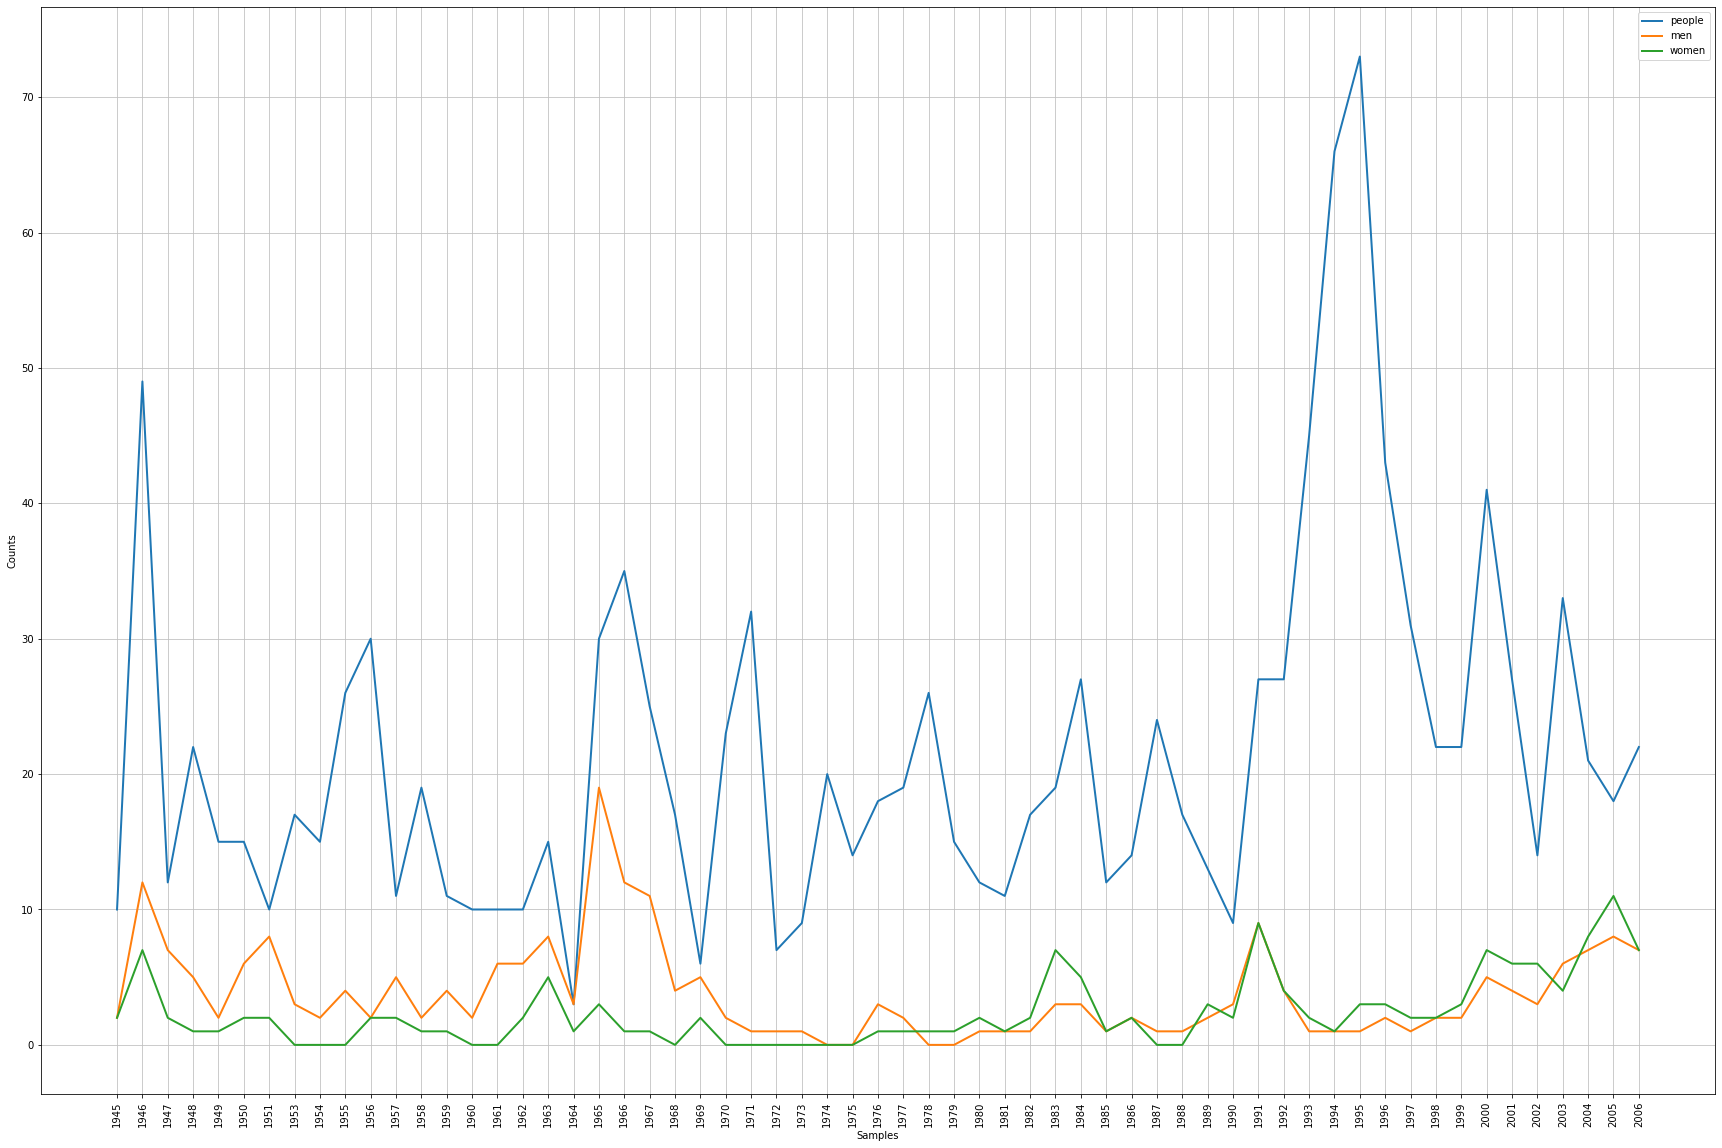

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
from nltk.corpus import state_union

# increase default plot size
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    # For each file
    for fileid in state_union.fileids()
    # Find all the words
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    # filter out so we only return words in target
    if w.lower() == target)
cfd.plot()


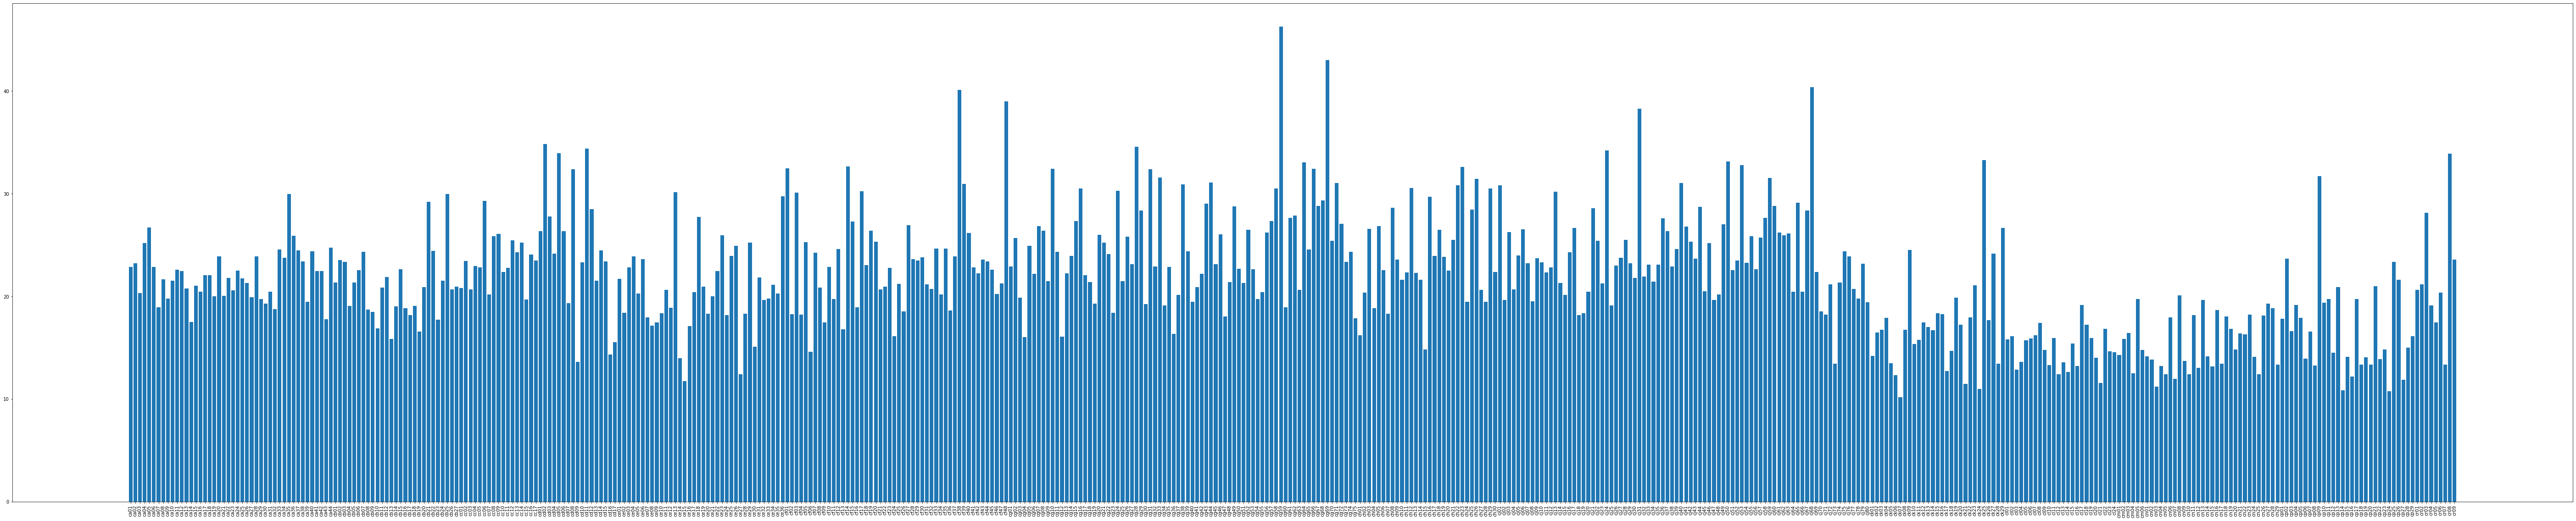

In [25]:
# FileIds are found by nltk.corpus.[corpus_name].fileids(), this is the names of the files within the corpus
fileids = nltk.corpus.brown.fileids()
output = {}
for ID in fileids:
    # Getting a given document can be done as following : nltk.corpus.[corpus_name].[split_type](fileids=[ID])
    sentences = nltk.corpus.brown.sents(fileids=ID)
    average_length = sum([len(sent) for sent in sentences])/len(sentences)
    output[ID] = average_length

# Equal length lists to represent the values in x and y directions
x_axis = list(output.keys())
y_axis = list(output.values())

plt.figure(figsize=(100, 20))
# using a bar graph, you can use .plot to get points or lines if applicable
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)

# Show the graph
plt.show()